In [1]:
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [2]:
Accra=pd.read_fwf('C:/Users/ofo/Desktop/Intership/GAUGE_PRECIP-20221019T112628Z-001/GAUGE_PRECIP/Accra_1983_2017_dRR_gapless.txt', header=None)

In [3]:
Accra.columns=['Year','Month','Day','Rain']
Accra['Date']=pd.to_datetime(Accra[['Year','Month','Day']])

In [4]:
ac=Accra.drop(['Year','Month','Day'], axis=1)
afc=ac.set_index('Date')

In [5]:
sac=afc.resample('y').sum()

In [6]:
sacmean=np.mean(sac)
sacano=sac['Rain']-sacmean

C:\Users\ofo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [17]:
acmean=sac['Rain'].mean()
sacano=sac['Rain']-acmean

In [18]:
sa=pd.DataFrame(sacano)

In [16]:
acmean

717.4314285714287

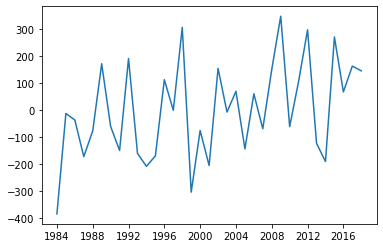

In [19]:
plt.plot(sa)

<BarContainer object of 35 artists>

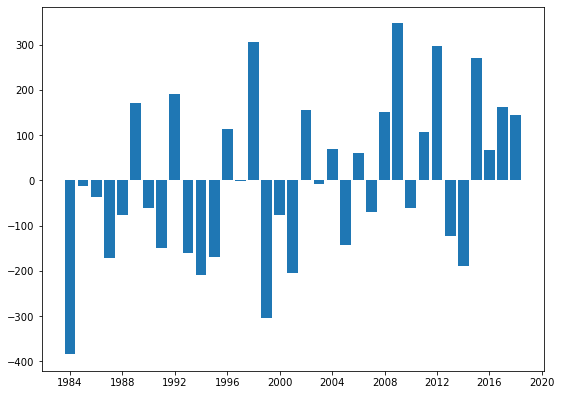

In [20]:
fig=plt.figure(figsize=(9,6.7))
plt.bar(sa.index,sa.Rain, width=300)

In [21]:
def ano (data):
    mean=np.mean(data)
    anomaly=data-mean
    return anomaly

In [22]:
anom=ano(sac)

C:\Users\ofo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


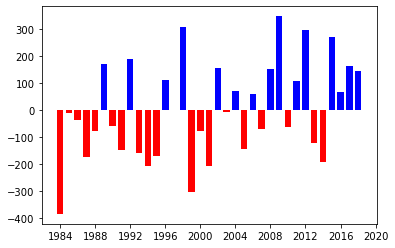

In [23]:
anom["color"] = np.where(anom["Rain"]<0, 'red', 'blue')

fig = plt.bar(anom.index,anom.Rain, color=anom.color, width=270)

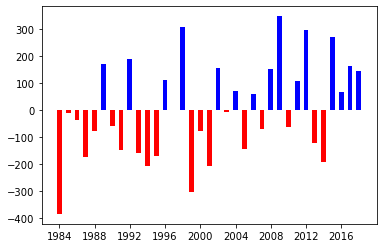

In [24]:
for i in anom.Rain:
    anom['colors'] = ['red' if float(
       x) < 0 else 'blue' for x in anom['Rain']]


fig = plt.bar(anom.index,anom.Rain,color=anom.colors, width=200)

In [29]:
anom["Color"] = np.where(sac['Rain']<717.43, 'red', 'blue')

fig = go.Figure()
fig.add_trace(
    go.Bar(name='Rain',
           x=anom.index,
           y=anom['Rain'],
           marker_color=anom['Color']))
fig.update_layout(barmode='stack')
fig.show()

In [28]:
acmean

717.4314285714287